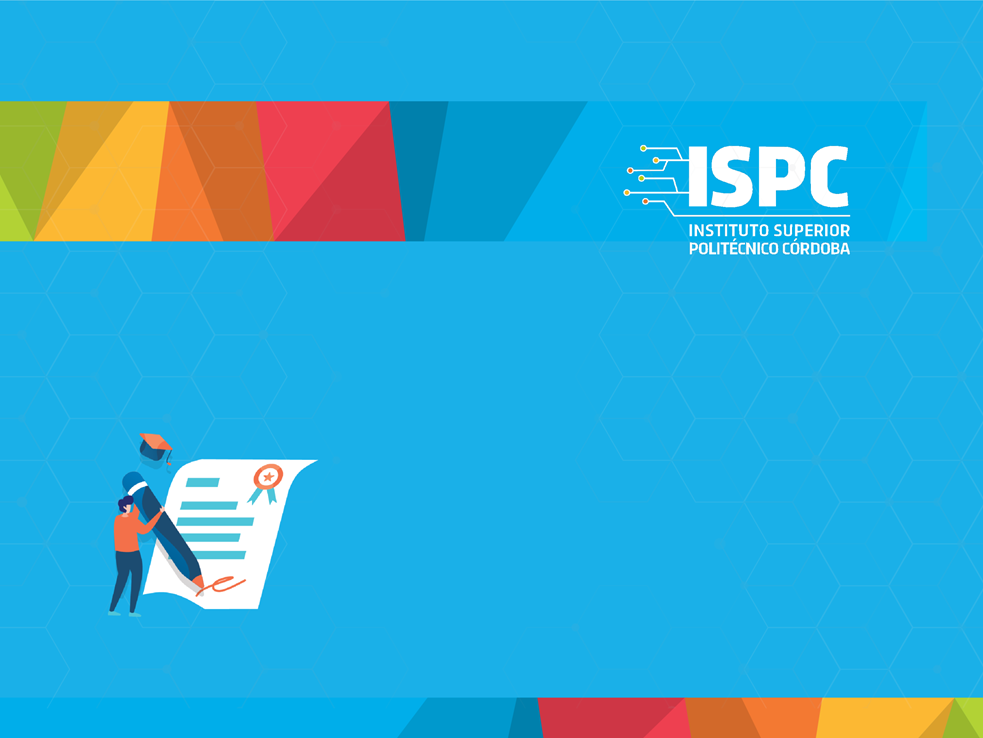

# Dividir el dataset en conjunto de entrenamiento y de testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([ 2.,  6., 19., 37., 36., 33., 38., 19.,  7.,  3.]),
 array([-2.70270911, -2.15896235, -1.61521558, -1.07146882, -0.52772206,
         0.0160247 ,  0.55977146,  1.10351822,  1.64726498,  2.19101175,
         2.73475851]),
 <BarContainer object of 10 artists>)

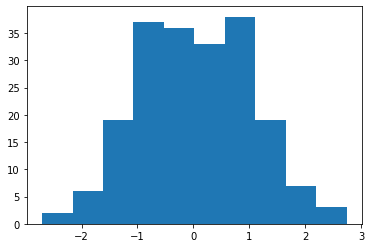

In [4]:
plt.hist(a)

In [5]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [6]:
len(training), len(testing)

(153, 47)

# Ajustar el modelo con ordinary least squares OLS 

In [7]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [8]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     662.2
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           3.63e-75
Time:                        16:00:31   Log-Likelihood:                -299.31
No. Observations:                 153   AIC:                             604.6
Df Residuals:                     150   BIC:                             613.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7915      0.339      8.244      0.000       2.122       3.460
TV             0.0473      0.002     29.287      0.000       0.044       0.050
Radio          0.1823      0.009     19.250      0.000       0.164       0.201
==============================================================================
Omnibus:                       47.013   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.046
Skew:                          -1.323   Prob(JB):                     1.55e-23
Kurtosis:                       6.078   Cond. No.                         413.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9336 + 0.0465 * TV + 0.1807 * Radio

## Validación del modelo con el conjunto de testing

In [9]:
sales_pred = lm.predict(testing)
sales_pred

2      11.974545
3      17.486930
14     18.442728
16     12.671650
20     18.170789
23     16.669633
27     17.191197
30     21.803374
35     17.286561
36     23.400172
38      9.698338
42     21.727070
46      8.838684
50     12.805466
51      9.289993
53     19.851174
55     21.205524
60      5.686218
69     21.049129
71     10.591555
77     13.686881
81     14.879451
88     11.617074
94     10.423352
99     16.789025
100    14.093057
104    20.310634
109    19.774678
116    11.981909
120    14.360545
123    14.922148
131    15.861826
134    11.575051
143     8.777466
144    10.039570
149     9.609892
153    18.131537
161    13.372281
172     7.383516
176    20.045383
180    10.671323
181    14.109203
182     6.488583
190    12.153873
193    18.338123
195     5.272654
197    12.857777
dtype: float64

In [10]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

113.61483512299858

In [11]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.6069086295444783

In [12]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.11100044913079142

<AxesSubplot:xlabel='TV', ylabel='Sales'>

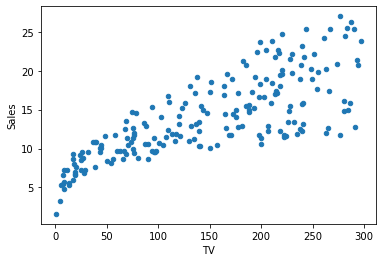

In [15]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales")
#plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

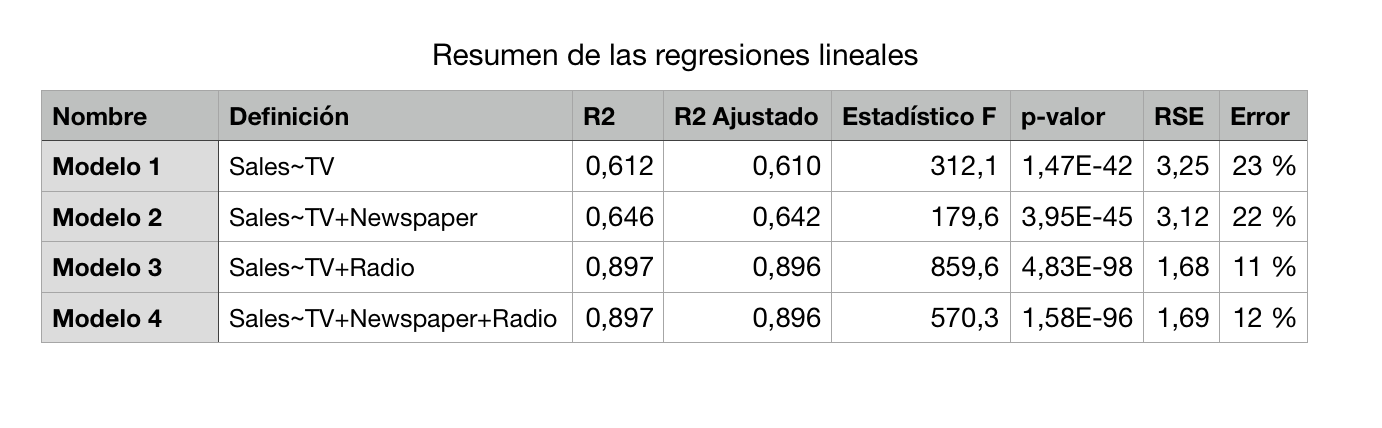

In [14]:
from IPython.display import Image
Image(filename="resources/summary-lm.png")